In [108]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Set tables reading options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 128)

year = 2019

# Files
players_names = "_Data/Predictions/stats_players_{}.csv".format(year)
predicted_probas = "_Data/Predictions/players_rounds_predictions_{}.csv".format(year)

# Read the csv files
players_df = pd.read_csv(players_names, header=0, index_col=0)
df = pd.read_csv(predicted_probas, names = ["Winner%", "Final%", "SF%", "QF%", 'R16%', 'R32%', 'R64%'])
df.index = range(1, len(df)+1)

# Concat names and probas
players_df = players_df.iloc[:,[0,4]]
new_df = pd.concat([players_df, df], axis=1)
new_df

,Name,rank,Winner%,Final%,SF%,QF%,R16%,R32%,R64%
1,Novak Djokovic,1.0,0.127071,0.199382,0.289392,0.396335,0.518301,0.661210,0.814016
2,Rafael Nadal,2.0,0.128365,0.194167,0.282906,0.387888,0.508767,0.652700,0.808033
3,Alexander Zverev,3.0,0.038045,0.073223,0.130090,0.217168,0.337179,0.501401,0.709855
4,Roger Federer,4.0,0.090259,0.138434,0.213422,0.318356,0.442240,0.594162,0.770769
5,Dominic Thiem,5.0,0.024742,0.049188,0.097025,0.165367,0.287453,0.453515,0.675634
6,Kei Nishikori,6.0,0.025575,0.049318,0.096732,0.166258,0.289196,0.455843,0.677511
7,Kevin Anderson,7.0,0.017649,0.035790,0.065214,0.133349,0.247453,0.411726,0.643829
8,Stefanos Tsitsipas,8.0,0.018640,0.037208,0.068668,0.138036,0.258935,0.422509,0.652539
9,Juan Martin Del Potro,9.0,0.047744,0.081739,0.136459,0.228421,0.338196,0.505543,0.712040
10,John Isner,10.0,0.020638,0.040268,0.075699,0.145931,0.241376,0.405900,0.639289


In [109]:
# Sort by highest probabilities for Winner
winner_df = new_df.sort_values(by=['Winner%'], ascending=False)
winner_df = winner_df.iloc[:,[0,1,2]]
winner_df

,Name,rank,Winner%
2,Rafael Nadal,2.0,0.128365
1,Novak Djokovic,1.0,0.127071
4,Roger Federer,4.0,0.090259
9,Juan Martin Del Potro,9.0,0.047744
3,Alexander Zverev,3.0,0.038045
15,Milos Raonic,15.0,0.027825
6,Kei Nishikori,6.0,0.025575
5,Dominic Thiem,5.0,0.024742
11,Marin Cilic,11.0,0.022512
10,John Isner,10.0,0.020638


In [110]:
# Sort by highest probabilities for Final
final_df = new_df.sort_values(by=['Final%'], ascending=False)
final_df = final_df.iloc[:,[0,1,3]]
final_df

,Name,rank,Final%
1,Novak Djokovic,1.0,0.199382
2,Rafael Nadal,2.0,0.194167
4,Roger Federer,4.0,0.138434
9,Juan Martin Del Potro,9.0,0.081739
3,Alexander Zverev,3.0,0.073223
15,Milos Raonic,15.0,0.049638
6,Kei Nishikori,6.0,0.049318
5,Dominic Thiem,5.0,0.049188
11,Marin Cilic,11.0,0.043344
10,John Isner,10.0,0.040268


In [111]:
# Sort by highest probabilities for SF
SF_df = new_df.sort_values(by=['SF%'], ascending=False)
SF_df = SF_df.iloc[:,[0,1,4]]
SF_df

,Name,rank,SF%
1,Novak Djokovic,1.0,0.289392
2,Rafael Nadal,2.0,0.282906
4,Roger Federer,4.0,0.213422
9,Juan Martin Del Potro,9.0,0.136459
3,Alexander Zverev,3.0,0.130090
5,Dominic Thiem,5.0,0.097025
6,Kei Nishikori,6.0,0.096732
15,Milos Raonic,15.0,0.086732
11,Marin Cilic,11.0,0.080298
10,John Isner,10.0,0.075699


In [112]:
# Sort by highest probabilities for QF
QF_df = new_df.sort_values(by=['QF%'], ascending=False)
QF_df = QF_df.iloc[:,[0,1,5]]
QF_df

,Name,rank,QF%
1,Novak Djokovic,1.0,0.396335
2,Rafael Nadal,2.0,0.387888
4,Roger Federer,4.0,0.318356
9,Juan Martin Del Potro,9.0,0.228421
3,Alexander Zverev,3.0,0.217168
6,Kei Nishikori,6.0,0.166258
5,Dominic Thiem,5.0,0.165367
11,Marin Cilic,11.0,0.153709
10,John Isner,10.0,0.145931
15,Milos Raonic,15.0,0.140255


In [113]:
# Sort by highest probabilities for R16
R16_df = new_df.sort_values(by=['R16%'], ascending=False)
R16_df = R16_df.iloc[:,[0,1,6]]
R16_df

,Name,rank,R16%
1,Novak Djokovic,1.0,0.518301
2,Rafael Nadal,2.0,0.508767
4,Roger Federer,4.0,0.442240
9,Juan Martin Del Potro,9.0,0.338196
3,Alexander Zverev,3.0,0.337179
6,Kei Nishikori,6.0,0.289196
5,Dominic Thiem,5.0,0.287453
8,Stefanos Tsitsipas,8.0,0.258935
15,Milos Raonic,15.0,0.257119
11,Marin Cilic,11.0,0.253482


In [114]:
# Sort by highest probabilities for R32
R32_df = new_df.sort_values(by=['R32%'], ascending=False)
R32_df = R32_df.iloc[:,[0,1,7]]
R32_df

,Name,rank,R32%
1,Novak Djokovic,1.0,0.661210
2,Rafael Nadal,2.0,0.652700
4,Roger Federer,4.0,0.594162
9,Juan Martin Del Potro,9.0,0.505543
3,Alexander Zverev,3.0,0.501401
6,Kei Nishikori,6.0,0.455843
5,Dominic Thiem,5.0,0.453515
15,Milos Raonic,15.0,0.424428
8,Stefanos Tsitsipas,8.0,0.422509
11,Marin Cilic,11.0,0.421185


In [115]:
# Sort by highest probabilities for R64
R64_df = new_df.sort_values(by=['R64%'], ascending=False)
R64_df = R64_df.iloc[:,[0,1,8]]
R64_df

,Name,rank,R64%
1,Novak Djokovic,1.0,0.814016
2,Rafael Nadal,2.0,0.808033
4,Roger Federer,4.0,0.770769
9,Juan Martin Del Potro,9.0,0.712040
3,Alexander Zverev,3.0,0.709855
6,Kei Nishikori,6.0,0.677511
5,Dominic Thiem,5.0,0.675634
15,Milos Raonic,15.0,0.653472
8,Stefanos Tsitsipas,8.0,0.652539
11,Marin Cilic,11.0,0.651074


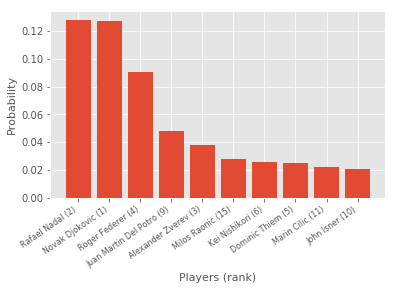

In [116]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR WINNER
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = winner_df.iloc[:nb_players, 0].tolist()
ranks = winner_df.iloc[:nb_players, 1].tolist()
probas = winner_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_winner.eps".format(year), bbox_inches = "tight")

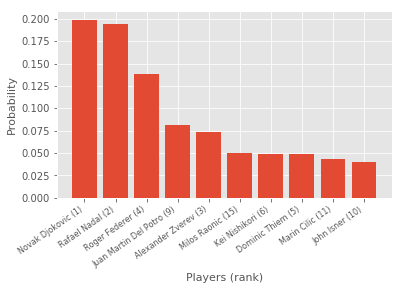

In [117]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR FINAL
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = final_df.iloc[:nb_players, 0].tolist()
ranks = final_df.iloc[:nb_players, 1].tolist()
probas = final_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_final.eps".format(year), bbox_inches = "tight")

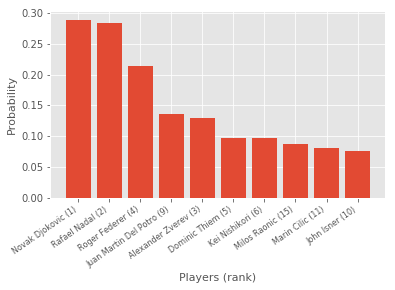

In [118]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR SF
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = SF_df.iloc[:nb_players, 0].tolist()
ranks = SF_df.iloc[:nb_players, 1].tolist()
probas = SF_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_SF.eps".format(year), bbox_inches = "tight")

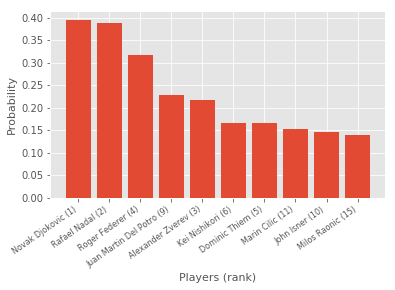

In [119]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR QF
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = QF_df.iloc[:nb_players, 0].tolist()
ranks = QF_df.iloc[:nb_players, 1].tolist()
probas = QF_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_QF.eps".format(year), bbox_inches = "tight")

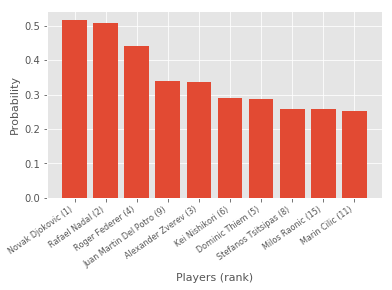

In [120]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R16
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R16_df.iloc[:nb_players, 0].tolist()
ranks = R16_df.iloc[:nb_players, 1].tolist()
probas = R16_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R16.eps".format(year), bbox_inches = "tight")

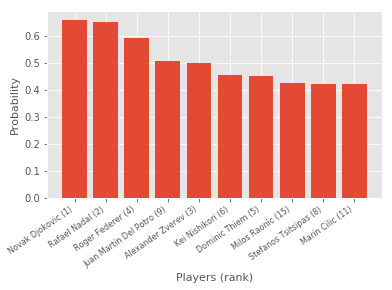

In [121]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R32
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R32_df.iloc[:nb_players, 0].tolist()
ranks = R32_df.iloc[:nb_players, 1].tolist()
probas = R32_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure() 
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R32.eps".format(year), bbox_inches = "tight")

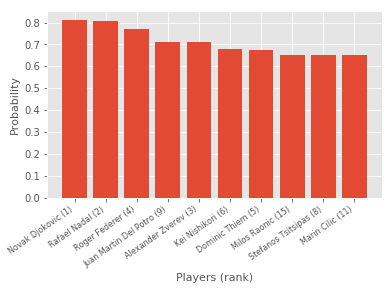

In [122]:
#-------------------------------------------------------------------------------------------
# BAR PLOT FOR R64
#-------------------------------------------------------------------------------------------
nb_players = 10

# Get names, ranks and probas of highest probabilities players
names = R64_df.iloc[:nb_players, 0].tolist()
ranks = R64_df.iloc[:nb_players, 1].tolist()
probas = R64_df.iloc[:nb_players, 2].tolist()

# Compute new labels for x-axis : Name (rank)
x_labels = []
for i, name in enumerate(names):
    new_label = name + ' (' + str(int(ranks[i])) + ')'
    x_labels.append(new_label)

# Plot
plt.figure()
plt.subplots_adjust(bottom=0.23)
x_pos = np.arange(0, nb_players, 1)
plt.bar(x_pos, probas)

# Set axes
plt.xticks(x_pos, x_labels, rotation=35, ha='right', fontsize=8)
plt.xlabel('Players (rank)', fontsize=11)
plt.ylabel('Probability', fontsize=11)

# Save the plot
plt.savefig("_Figures/rounds_{}_R64.eps".format(year), bbox_inches = "tight")